In [29]:
import pandas as pd
import numpy as np
import os
import geopandas
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline
import math
import seaborn as sns

In [2]:
29.5 to 32.533   
73.916 to 76.8333

SyntaxError: invalid syntax (<ipython-input-2-499b01a7daec>, line 1)

In [22]:
df = pd.read_csv('VIIRS_98825/fire_archive_V1_98825.csv')
print(df.shape)
df = df.drop(['instrument'],axis=1)
df = df.loc[(df['latitude']>29) & (df['latitude']<32.533) & (df['longitude']>73.916) & (df['longitude']<76.833) & (df['type']==0)]
print(df.shape)

(4430802, 14)
(722157, 13)


In [27]:
print(df['acq_date'].min())
print(df['acq_date'].max())
print(df['bright_ti4'].min())
print(df['bright_ti4'].max())
print(df['bright_ti5'].min())
print(df['bright_ti5'].max())

2012-01-21
2019-09-30
208.0
367.0
248.8
362.8


In [6]:

df.tail(25)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,type
4430492,31.36862,75.12462,333.9,0.59,0.70,2019-09-26,859,N,n,1,290.9,8.1,0
4430493,31.32271,74.84209,334.2,0.57,0.69,2019-09-26,859,N,n,1,290.8,4.1,0
4430515,29.91388,76.74802,328.3,0.37,0.58,2019-09-27,840,N,n,1,290.6,2.4,0
4430516,30.34077,76.68195,347.3,0.37,0.58,2019-09-27,840,N,n,1,292.1,5.5,0
4430518,30.09462,76.40836,330.2,0.36,0.57,2019-09-27,840,N,n,1,290.8,3.1,0
4430519,30.06547,76.70641,330.8,0.37,0.58,2019-09-27,840,N,n,1,291.0,4.0,0
4430520,30.09703,76.41129,334.0,0.36,0.57,2019-09-27,840,N,n,1,290.9,3.2,0
4430521,30.09170,76.41176,336.0,0.36,0.57,2019-09-27,840,N,n,1,291.2,2.3,0
4430522,30.09490,76.41217,339.4,0.36,0.57,2019-09-27,840,N,n,1,291.1,3.1,0
4430523,30.50993,74.27843,337.5,0.54,0.51,2019-09-27,840,N,n,1,294.7,4.9,0


In [31]:
Months = ['nothing','Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
months_maker = ['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
Months_no = ['00','01','02','03','04','05','06','07','08','09','10','11','12']
Year = ['2012','2013','2014','2015','2016','2017','2018','2019']

In [39]:
list_maker = []
for i in range(1,13):
    initial_date = Year[2] + '-'+Months_no[i]+'-'+'01'
    final_date = Year[2] + '-'+Months_no[i]+'-'+'28'
    df1 = df.loc[(df['acq_date']>=initial_date)&(df['acq_date']<=final_date)]
    print(Months[i], df1.shape," initial : ",initial_date," final : ",final_date)
    list_maker.append(df1.shape[0])

Jan (195, 13)  initial :  2014-01-01  final :  2014-01-28
Feb (347, 13)  initial :  2014-02-01  final :  2014-02-28
Mar (205, 13)  initial :  2014-03-01  final :  2014-03-28
April (239, 13)  initial :  2014-04-01  final :  2014-04-28
May (22204, 13)  initial :  2014-05-01  final :  2014-05-28
June (1477, 13)  initial :  2014-06-01  final :  2014-06-28
July (61, 13)  initial :  2014-07-01  final :  2014-07-28
Aug (6, 13)  initial :  2014-08-01  final :  2014-08-28
Sept (647, 13)  initial :  2014-09-01  final :  2014-09-28
Oct (20621, 13)  initial :  2014-10-01  final :  2014-10-28
Nov (50560, 13)  initial :  2014-11-01  final :  2014-11-28
Dec (313, 13)  initial :  2014-12-01  final :  2014-12-28


In [40]:
list_maker

[195, 347, 205, 239, 22204, 1477, 61, 6, 647, 20621, 50560, 313]

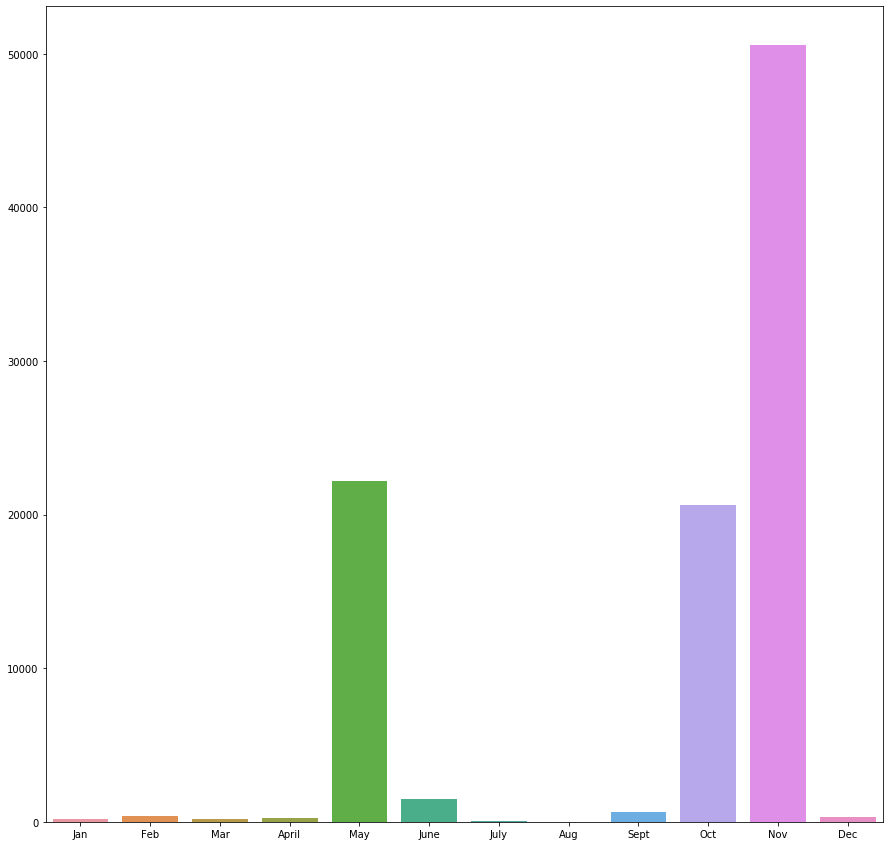

In [41]:
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.barplot(x=months_maker,y=list_maker)

In [9]:
print(df.shape)
len(np.unique(df['latitude']))

(722157, 13)


245047

In [10]:
df1 = df.loc[(df['acq_date']>'2018-01-01')&(df['acq_date']<'2018-01-28')]
print("January : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-02-01')&(df['acq_date']<'2018-02-28')]
print("February : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-03-01')&(df['acq_date']<'2018-03-28')]
print("March : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-04-01')&(df['acq_date']<'2018-04-28')]
print("April : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-05-01')&(df['acq_date']<'2018-05-28')]
print("May : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-06-01')&(df['acq_date']<'2018-06-28')]
print("June : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-07-01')&(df['acq_date']<'2018-07-28')]
print("July : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-08-01')&(df['acq_date']<'2018-08-28')]
print("August : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-09-01')&(df['acq_date']<'2018-09-28')]
print("Sept : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-10-01')&(df['acq_date']<'2018-10-28')]
print("Oct : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-11-01')&(df['acq_date']<'2018-11-28')]
print("Nov : ", df1.shape)
df1 = df.loc[(df['acq_date']>'2018-12-01')&(df['acq_date']<'2018-12-28')]
print("December : ", df1.shape)

January :  (354, 13)
February :  (429, 13)
March :  (407, 13)
April :  (602, 13)
May :  (20838, 13)
June :  (612, 13)
July :  (64, 13)
August :  (3, 13)
Sept :  (56, 13)
Oct :  (11660, 13)
Nov :  (40612, 13)
December :  (453, 13)


In [11]:
# print(df.shape)


In [12]:
print(np.unique(df1['acq_date']))

['2018-12-02' '2018-12-03' '2018-12-04' '2018-12-05' '2018-12-06'
 '2018-12-07' '2018-12-08' '2018-12-09' '2018-12-10' '2018-12-11'
 '2018-12-13' '2018-12-14' '2018-12-15' '2018-12-16' '2018-12-17'
 '2018-12-18' '2018-12-19' '2018-12-20' '2018-12-21' '2018-12-22'
 '2018-12-23' '2018-12-24' '2018-12-25' '2018-12-26' '2018-12-27']


Text(0.5, 1, 'Fire dots')

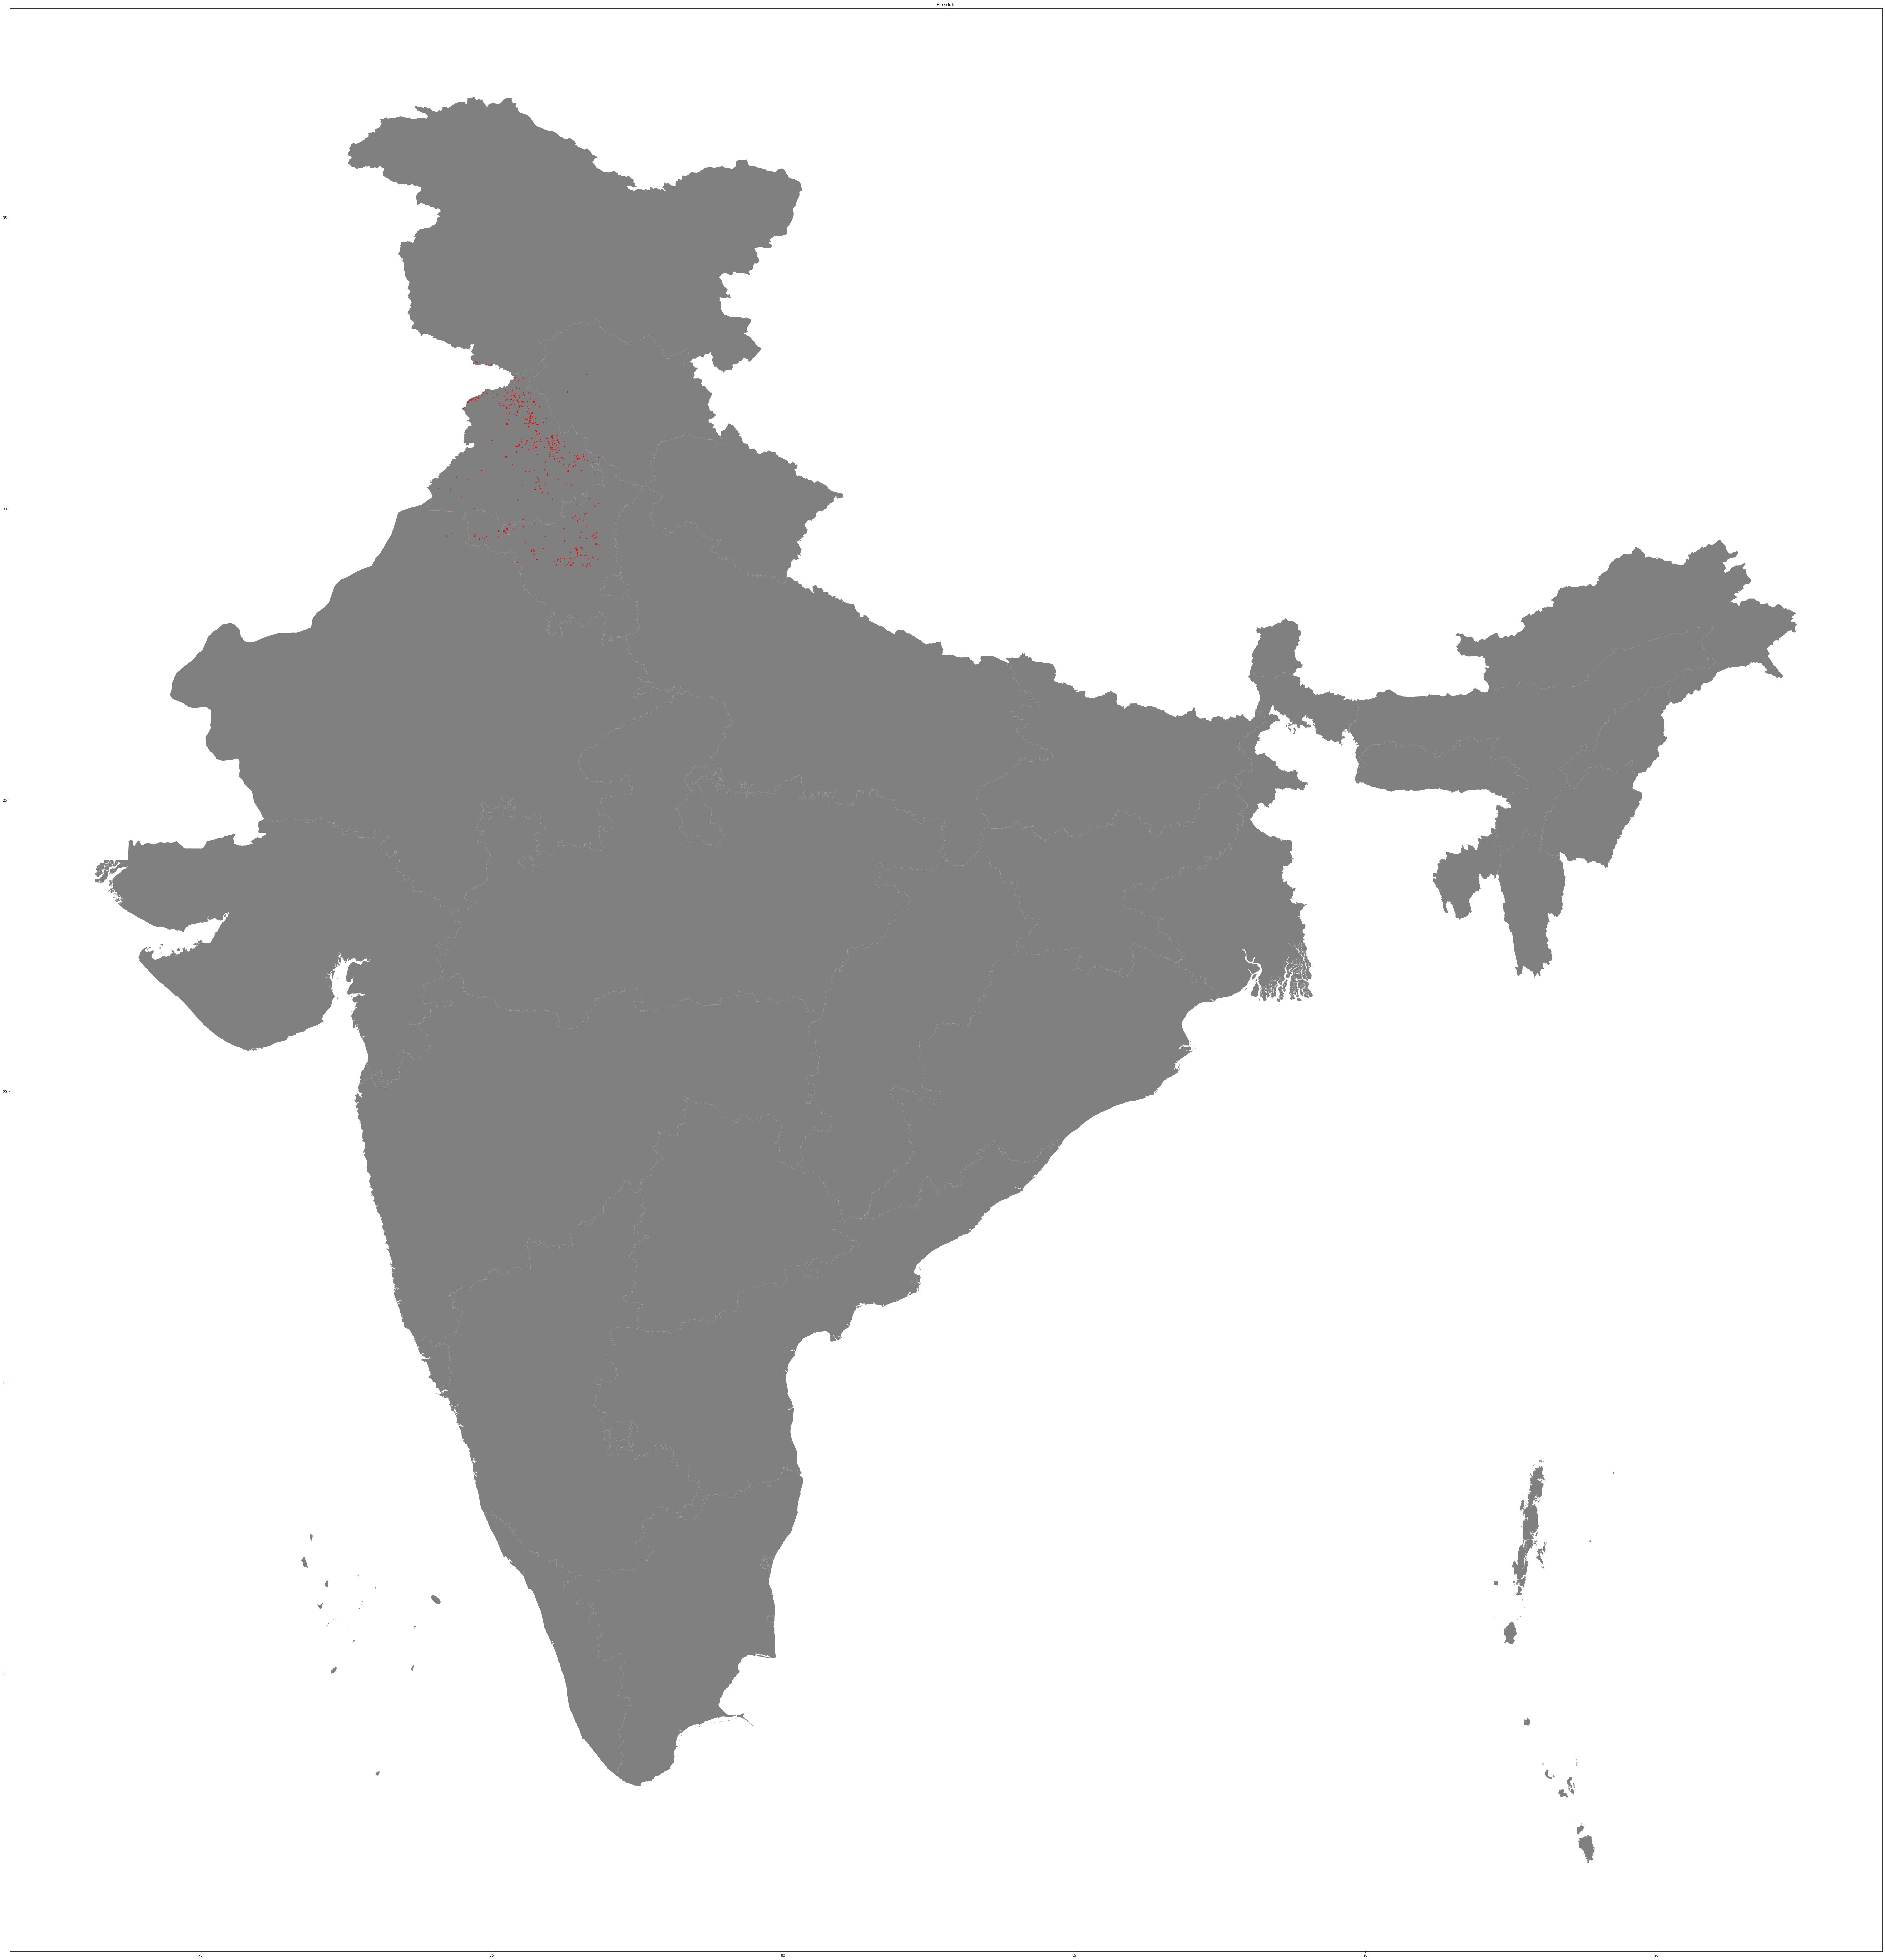

In [13]:
#Proper printing code 

states = geopandas.read_file('/home/naveenggmu/Downloads/NASA data/Igismap/Indian_States.shp')
g = [Point(xy) for xy in zip(df1['longitude'], df1['latitude'])]
geo_df = geopandas.GeoDataFrame(df1, geometry = g)

fig, ax = plt.subplots(figsize = (100,100))
states.plot(color='grey', ax=ax, alpha = 1)
geo_df.plot(color='red', markersize=5, ax=ax, label = 'Fire')

plt.title('Fire dots')

In [14]:
df1 = df.loc[(df['acq_date']>='2017-05-01')&(df['acq_date']<='2017-05-28')]
print(df1.shape)

(16943, 13)


In [15]:
d = df1.groupby(['acq_date'])
print(d.first())

            latitude  longitude  bright_ti4  scan  track  acq_time satellite  \
acq_date                                                                       
2017-05-01  29.92653   75.77874       352.3  0.52   0.42       820         N   
2017-05-02  29.45789   76.82880       342.9  0.39   0.36       801         N   
2017-05-03  29.23721   76.52852       343.2  0.49   0.40       742         N   
2017-05-04  29.94644   75.69463       333.3  0.63   0.54       724         N   
2017-05-05  29.93150   76.02064       339.3  0.57   0.69       705         N   
2017-05-06  29.34529   76.66444       340.1  0.47   0.48       826         N   
2017-05-07  29.20382   76.63978       346.6  0.42   0.37       807         N   
2017-05-08  29.38101   76.47713       346.1  0.42   0.38       749         N   
2017-05-09  31.08953   74.98162       335.8  0.53   0.50       730         N   
2017-05-10  29.95581   75.09601       332.4  0.52   0.67       711         N   
2017-05-11  32.21507   75.39361       33

In [246]:
df = pd.read_csv('VIIRS_98825/fire_archive_V1_98825.csv')
print(df.shape)
df = df.drop(['instrument'],axis=1)
df = df.loc[(df['latitude']>29.95) & (df['latitude']<30) & (df['longitude']>75) & (df['longitude']<76) & (df['type']==0)]
print(df.shape)
df['acq_date'] = df['acq_date'].astype('datetime64[ns]') 


(4430802, 14)
(8155, 13)


In [247]:
lat_max = df['latitude'].max()
lat_min = df['latitude'].min()

long_max = df['longitude'].max()
long_min = df['longitude'].min()
l_m = long_min

dif_lat = lat_max - lat_min
dif_long = long_max - long_min

d_lat = dif_lat/8
d_long = dif_long/8
print("Minimun longitude ",long_min,"Maximum longitude ",long_max, "Difference", dif_long, "Part ", d_long) 
print("Minimun latitude ",lat_min,"Maximum latitude ",lat_max, "Difference", dif_lat, "Part ", d_lat)
df['locations'] = 0
place = 1
while(lat_min<lat_max):
#     print("Latitude value ",lat_min)
    long_min = l_m
    while(long_min<long_max):
            df.loc[(df['latitude']>lat_min)&(df['latitude']<(lat_min+d_lat))
                  & (df['longitude']>long_min)&(df['longitude']<(long_min + d_long)),"locations"] = place
            place = place + 1
#             print("Longitude value ",long_min)
            long_min = long_min + d_long
    
    lat_min = lat_min + d_lat       
print('Total Boxes ', place)    

Minimun longitude  75.00027 Maximum longitude  75.99991999999999 Difference 0.9996499999999884 Part  0.12495624999999855
Minimun latitude  29.950020000000002 Maximum latitude  29.999979999999997 Difference 0.04995999999999512 Part  0.00624499999999939
Total Boxes  73


0.04995999999999512

In [248]:
print(df['locations'].max())
print(df['locations'].min())

71
0


In [204]:
df[df['locations']==71]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,type,locations
372989,29.99726,75.93456,348.9,0.41,0.37,2012-05-09,807,N,n,1,313.4,10.9,0,71
419340,29.99638,75.92406,345.2,0.43,0.38,2012-05-26,748,N,n,1,315.1,5.4,0,71
480796,29.99698,75.96417,335.1,0.38,0.36,2012-10-27,800,N,n,1,308.0,29.1,0,71
502727,29.99601,75.95693,332.3,0.43,0.38,2012-11-02,747,N,n,1,300.8,2.2,0,71
504581,29.99578,75.98696,340.2,0.49,0.49,2012-11-03,728,N,n,1,301.6,9.7,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921255,29.99915,75.99854,339.9,0.46,0.39,2018-11-07,815,N,n,1,305.9,6.4,0,71
3928095,29.99732,75.90639,333.2,0.39,0.36,2018-11-08,756,N,n,1,302.3,2.4,0,71
3951734,29.99808,75.89639,332.3,0.44,0.46,2018-11-17,827,N,n,1,302.3,3.6,0,71
4319935,29.99895,75.89911,345.6,0.33,0.56,2019-05-06,839,N,l,1,318.9,4.2,0,71


In [210]:
location_id = np.unique(df['locations'])
location_id

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56,
       57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71])

In [249]:
cof = []
location_id =[]


for i in range(1,df['locations'].max()+1):
    cof.append(df[df["locations"]==i].shape[0])

for i in range(1,len(cof)+1):
    location_id.append(i)
        

print(len(location_id))
print(len(cof))

# print(len(location_id))
hm_df = pd.DataFrame()
hm_df['location_id'] = location_id
hm_df['cof'] = cof
hm_df
# hm_df = pd.DataFrame()
# hm_df['location_id','cof']

71
71


,location_id,cof
0,1,51
1,2,37
2,3,83
3,4,128
4,5,155
...,...,...
66,67,107
67,68,180
68,69,164
69,70,141


In [225]:
df.loc[df['locations']==1]['longitude'].min()

75.00676

In [226]:
df.loc[df['locations']==1]['longitude'].max()

75.12014

In [251]:
max_lat_coords = []
min_lat_coords = []
max_long_coords = []
min_long_coords = []
avg_lat_coords = []
avg_long_coords = []

for index,rows in hm_df.iterrows():

        locat = rows['location_id']
        max_lat_coords.append(df.loc[df['locations']==locat]['latitude'].max())
        min_lat_coords.append(df.loc[df['locations']==locat]['latitude'].min())
        avg_lat = (df.loc[df['locations']==locat]['latitude'].max() +df.loc[df['locations']==locat]['latitude'].min())/2
        avg_lat_coords.append(avg_lat)
        
        max_long_coords.append(df.loc[df['locations']==locat]['longitude'].max())
        min_long_coords.append(df.loc[df['locations']==locat]['longitude'].min())
        avg_long = (df.loc[df['locations']==locat]['longitude'].max()+df.loc[df['locations']==locat]['longitude'].min() )/2
        avg_long_coords.append(avg_long)


print(len(max_lat_coords))
print(len(min_lat_coords))

print(len(max_long_coords))
print(len(min_long_coords))



71
71
71
71


In [252]:
hm_df['max_lat'] = max_lat_coords 
hm_df['min_lat'] = min_lat_coords
hm_df['max_long'] =max_long_coords
hm_df['min_long'] =min_long_coords
hm_df['avg_lat']= avg_lat_coords
hm_df['avg_long']=avg_long_coords

In [253]:
hm_df.head(50)

,location_id,cof,max_lat,min_lat,max_long,min_long,avg_lat,avg_long
0,1,51,29.95612,29.95028,75.12014,75.00676,29.953200,75.063450
1,2,37,29.95619,29.95012,75.24690,75.14828,29.953155,75.197590
2,3,83,29.95626,29.95004,75.37472,75.25031,29.953150,75.312515
3,4,128,29.95626,29.95011,75.49973,75.37788,29.953185,75.438805
4,5,155,29.95624,29.95004,75.62473,75.50130,29.953140,75.563015
5,6,168,29.95624,29.95006,75.74995,75.62515,29.953150,75.687550
6,7,162,29.95624,29.95004,75.87385,75.75029,29.953140,75.812070
7,8,154,29.95621,29.95004,75.99942,75.87510,29.953125,75.937260
8,9,0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,74,29.96246,29.95630,75.12363,75.00211,29.959380,75.062870


In [254]:
print(hm_df.shape)
hm_df.dropna(inplace=True)
print(hm_df.shape)

(71, 8)
(65, 8)


In [255]:
avgcof = hm_df['cof'].mean()
hm_df = hm_df.loc[hm_df['cof']>avgcof]
print(hm_df.shape)

(38, 8)


In [256]:
hm_df['cof'].sum()

6170

In [257]:
hm_df

,location_id,cof,max_lat,min_lat,max_long,min_long,avg_lat,avg_long
3,4,128,29.95626,29.95011,75.49973,75.37788,29.953185,75.438805
4,5,155,29.95624,29.95004,75.62473,75.50130,29.953140,75.563015
5,6,168,29.95624,29.95006,75.74995,75.62515,29.953150,75.687550
6,7,162,29.95624,29.95004,75.87385,75.75029,29.953140,75.812070
7,8,154,29.95621,29.95004,75.99942,75.87510,29.953125,75.937260
12,13,169,29.96250,29.95631,75.49989,75.37520,29.959405,75.437545
13,14,156,29.96241,29.95630,75.62454,75.50084,29.959355,75.562690
14,15,170,29.96250,29.95627,75.74947,75.62559,29.959385,75.687530
15,16,135,29.96249,29.95633,75.87384,75.75019,29.959410,75.812015
16,17,178,29.96251,29.95631,75.99911,75.87971,29.959410,75.939410


In [259]:
df.shape

(8155, 14)

Text(0.5, 1, 'Fire dots')

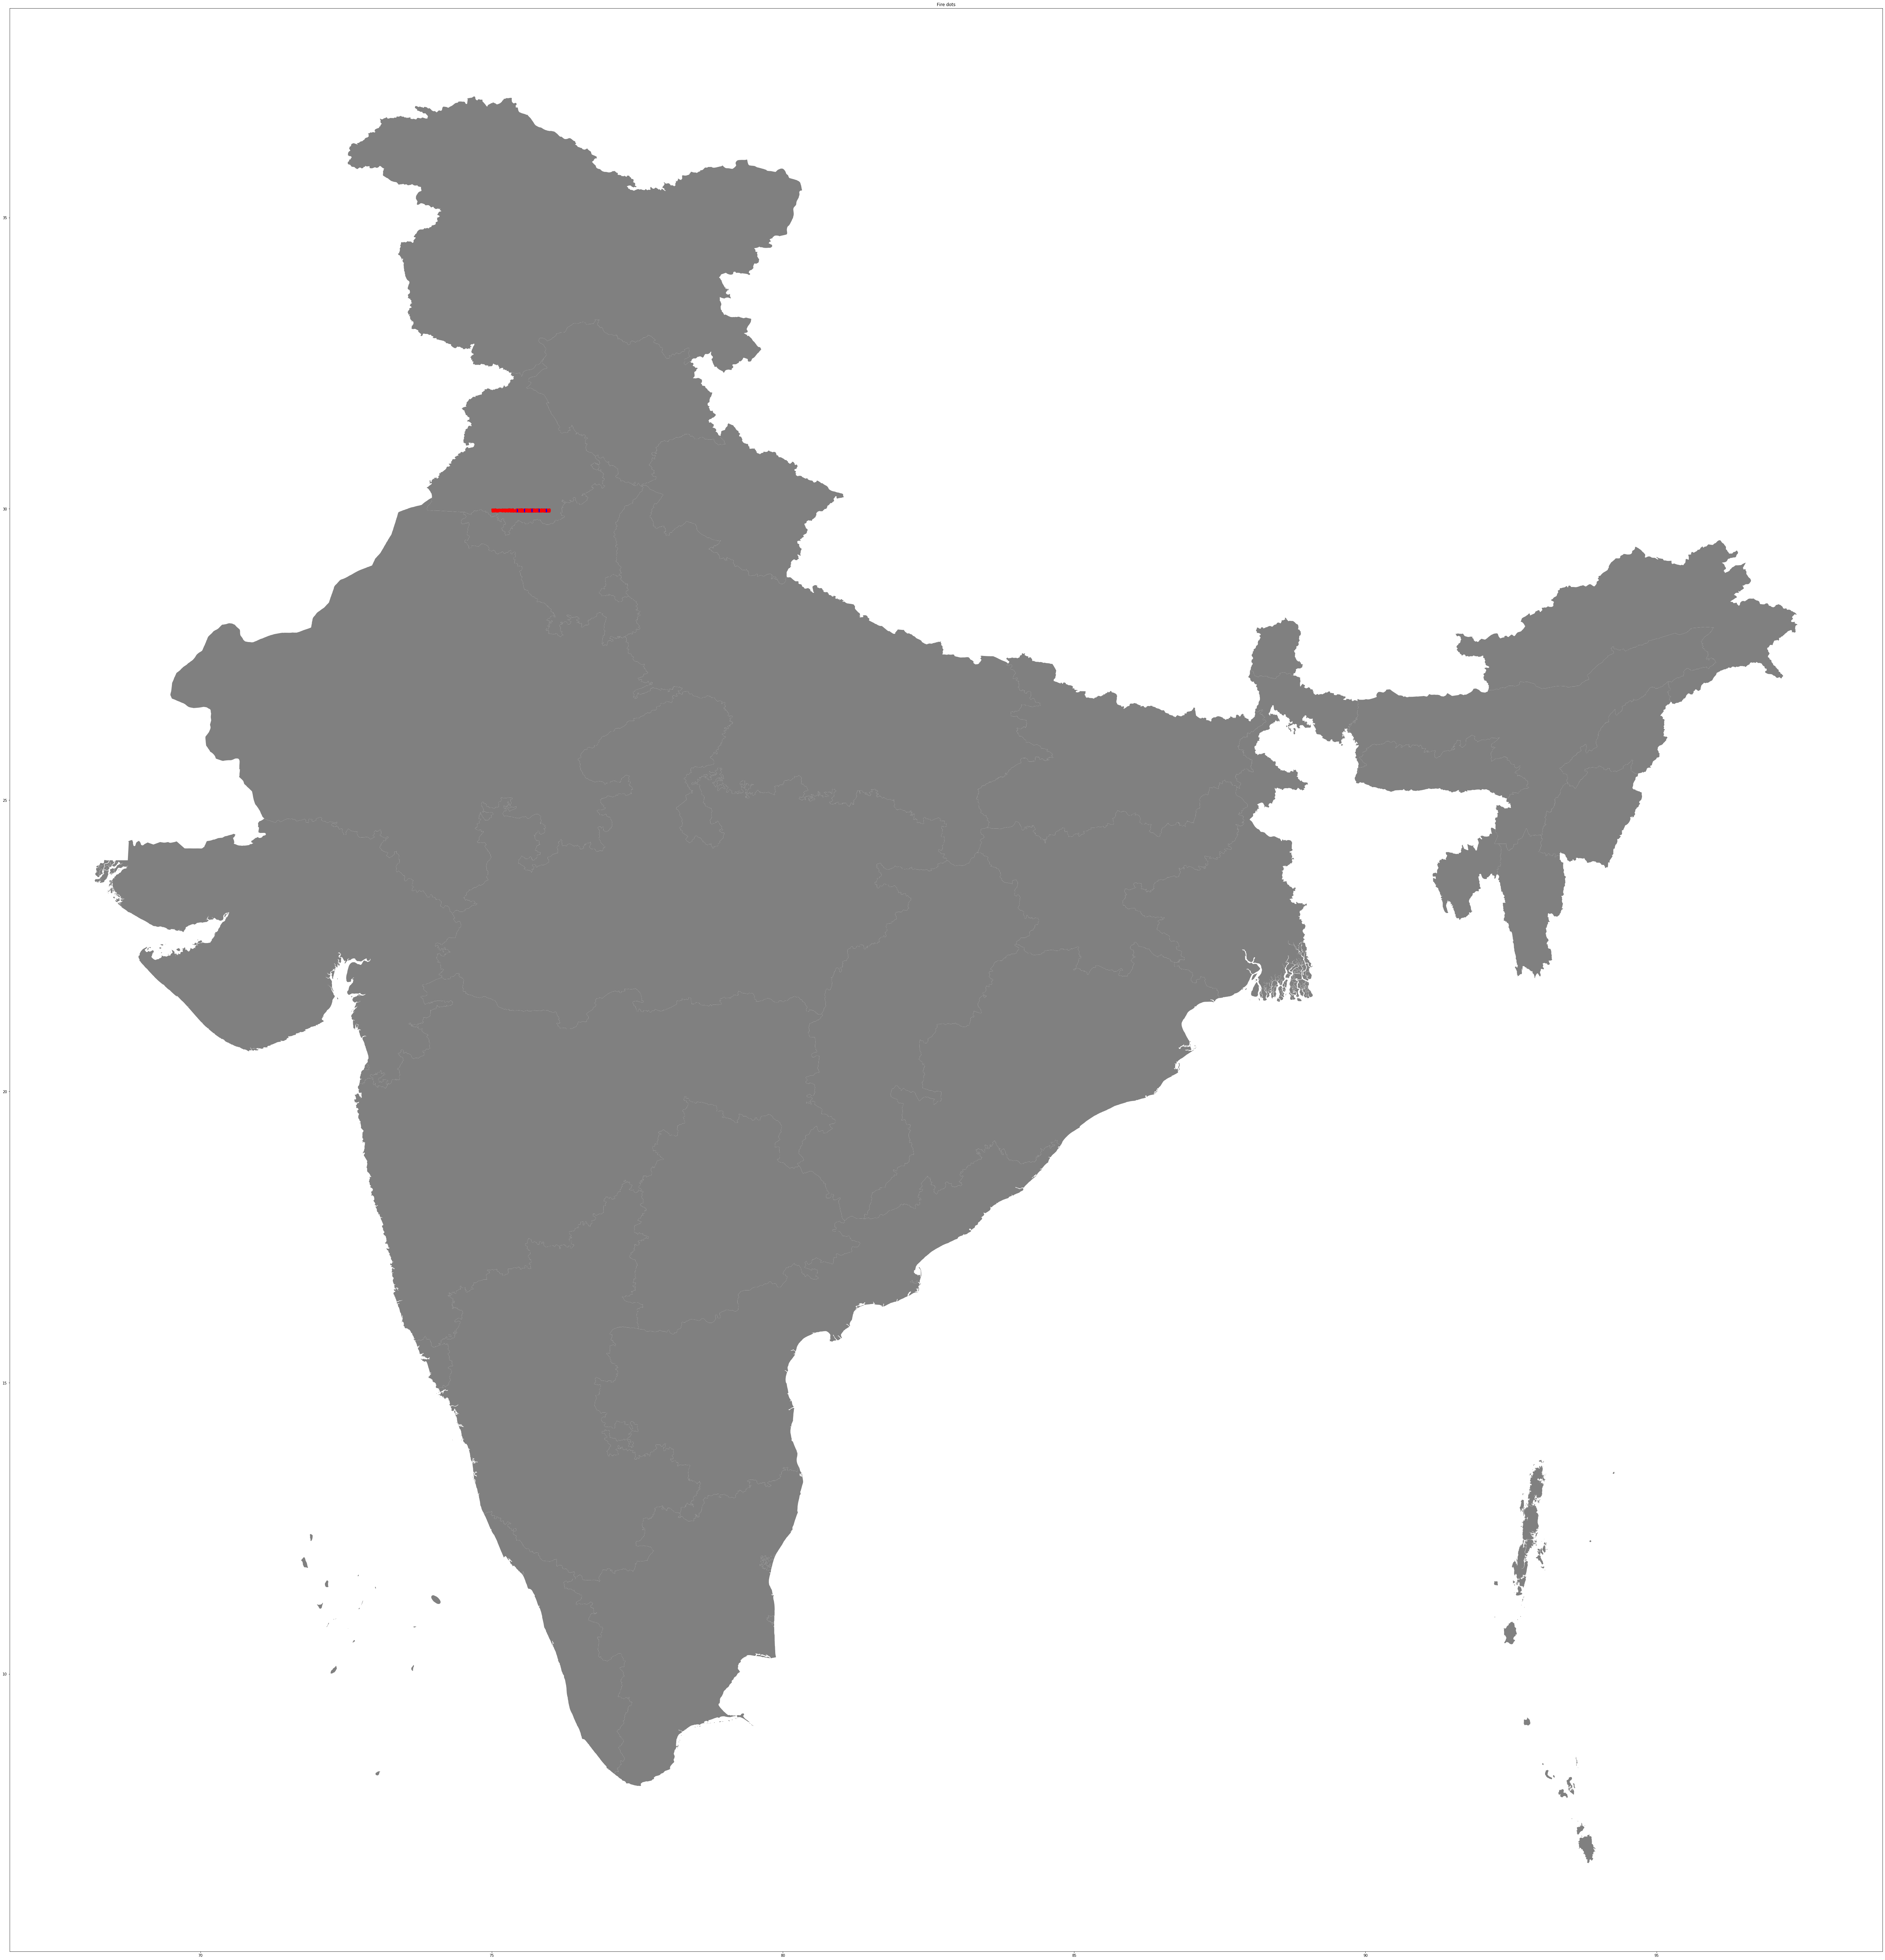

In [262]:
states = geopandas.read_file('/home/naveenggmu/Downloads/NASA data/Igismap/Indian_States.shp')
g = [Point(xy) for xy in zip(hm_df['avg_long'], hm_df['avg_lat'])]
g1 = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

geo_df = geopandas.GeoDataFrame(hm_df, geometry = g)
geo_df_fire = geopandas.GeoDataFrame(df, geometry = g1)

fig, ax = plt.subplots(figsize = (100,100))
states.plot(color='grey', ax=ax, alpha = 1)

geo_df_fire.plot(color='red', markersize=5, ax=ax, label = 'Fire',alpha = 0.5)
geo_df.plot(color='blue', markersize=5, ax=ax, label = 'Centre')
plt.title('Fire dots')

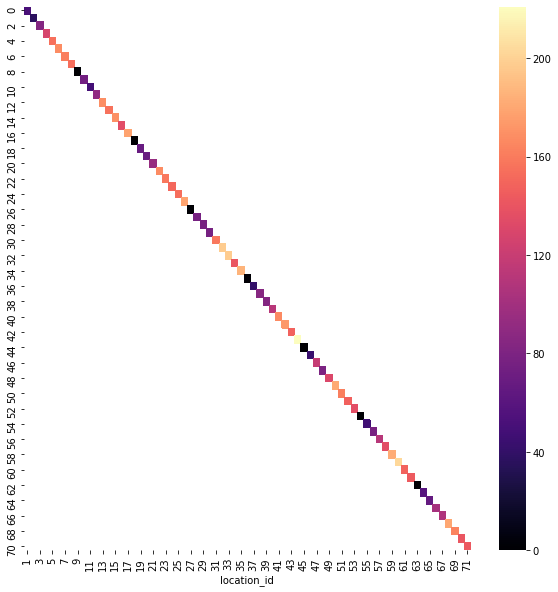

In [241]:
hm_df_hm = hm_df.pivot(columns = 'location_id',values = 'cof') 
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(hm_df_hm,cmap = "magma" )

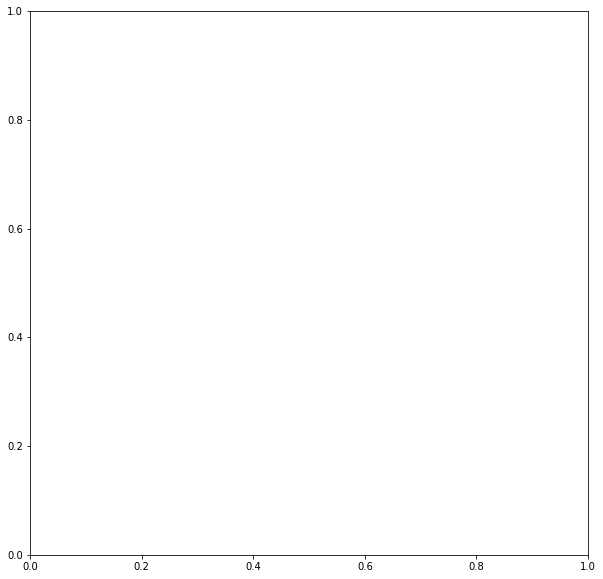

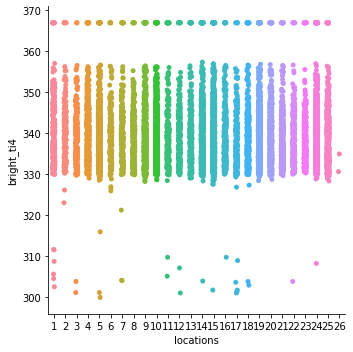

In [180]:
# fig, ax = plt.subplots(figsize = (10,10))
ax = sns.catplot(x="locations", y="bright_ti4", data=df);

In [18]:
print(type(df['acq_date'][367061]))
df['acq_date'] = df['acq_date'].astype('datetime64[ns]') 


<class 'str'>


In [19]:
df.dtypes

latitude             float64
longitude            float64
bright_ti4           float64
scan                 float64
track                float64
acq_date      datetime64[ns]
acq_time               int64
satellite             object
confidence            object
version                int64
bright_ti5           float64
frp                  float64
type                   int64
locations              int64
dtype: object

In [54]:
df[df['locations']==26]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,type,locations
508473,29.99999,74.61272,330.7,0.55,0.68,2012-11-04,710,N,n,1,298.1,4.0,0,26
3233718,29.99999,74.69035,335.0,0.47,0.48,2017-10-21,737,N,n,1,303.6,4.6,0,26


In [52]:
print(np.unique(df['locations']))
print(place)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
31


In [147]:
max_list = []
for i in range(1,df['locations'].max()+1):

#     print("location ",i, " shape", df[df['locations']==i].shape)
    max_list.append(df[df['locations']==i].shape[0])

# max_list
max_qty = max(max_list)
min_qty = min(max_list)
location_index_max = max_list.index(max_qty) + 1
location_index_min = max_list.index(min_qty) + 1
print(max_list)
# print(max_list)
# print(max_qty)
# print(location_index)
print("Location max", max_qty,"Index", location_index_max)
print("Location min", min_qty,"Index", location_index_min)
location_index = 2
x = df[df['locations']==location_index]
x = x[['acq_date','bright_ti4']]
print(x.dtypes)
print(x.shape)

[233, 168, 252, 611, 586, 170, 198, 308, 674, 616, 248, 218, 297, 681, 688, 288, 200, 342, 677, 564, 329, 248, 276, 648, 546, 2]
Location max 688 Index 15
Location min 2 Index 26
acq_date      datetime64[ns]
bright_ti4           float64
dtype: object
(168, 2)


In [148]:
print(x.dtypes)
print(dates.dtypes)

acq_date      datetime64[ns]
bright_ti4           float64
dtype: object
acq_date    datetime64[ns]
dtype: object


In [151]:
len(np.unique(x['acq_date']))

94

In [152]:
rng = pd.date_range('2012-01-21',end='2019-09-30', freq='D')
dates = pd.DataFrame({ 'acq_date': rng})
x.reset_index(drop=True, inplace=True)

print("Fire Points Data ",x['acq_date'].max(),x['acq_date'].min())
print("All Data ",dates['acq_date'].max(),dates['acq_date'].min())

print(x.shape)
print(dates.shape)
new_x = pd.merge(dates,x,on='acq_date',how = 'left')
print(new_x.shape)
new_x = new_x.fillna(0)
new_x.sort_values(by=['acq_date'],inplace=True)

Fire Points Data  2019-05-20 00:00:00 2012-05-07 00:00:00
All Data  2019-09-30 00:00:00 2012-01-21 00:00:00
(168, 2)
(2810, 1)
(2884, 2)


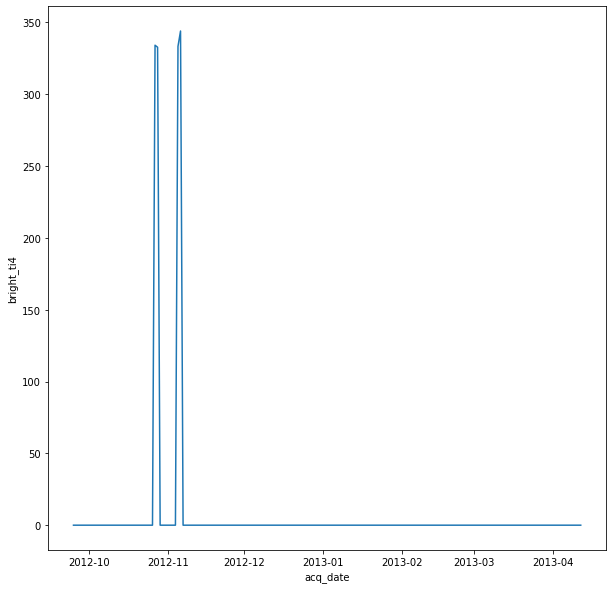

In [159]:

small_segment = new_x.iloc[250:450]
#Plotting graph with Brightqty vs Dates at location with max records 
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.lineplot(x='acq_date',y = 'bright_ti4',data = small_segment)

In [20]:
df.groupby(['longitude', 'latitude']).size().reset_index(name='Freq')
# Amritsar
# Latitude : 31.616
# Longitude: 74.9166
#     31 + 37/60

,longitude,latitude,Freq
0,74.50002,29.99179,1
1,74.50026,29.99660,1
2,74.50035,29.98934,1
3,74.50066,29.97003,1
4,74.50092,29.95179,1
...,...,...,...
10063,75.99940,29.96281,1
10064,75.99942,29.95379,1
10065,75.99957,29.98293,1
10066,75.99979,29.97706,1


In [ ]:
len(np.unique(df['latitude']))

In [ ]:
np.unique(df['locations'])

In [ ]:
df[df['locations']==19]
# print(df['latitude'].min(), df['latitude'].max())

In [76]:
# create an array of 5 dates starting at '2015-02-24', one per day


In [78]:
dates.shape
dates

,Date,Val
0,2012-01-21,-0.093578
1,2012-01-22,-1.204644
2,2012-01-23,0.431383
3,2012-01-24,-0.763833
4,2012-01-25,1.086084
...,...,...
2805,2019-09-26,-0.456947
2806,2019-09-27,0.892079
2807,2019-09-28,-0.453271
2808,2019-09-29,-1.315549


In [ ]:
imp = df[df['locations']==19]
imp = imp[['acq_date','bright_ti4']]
imp.columns = ['Date','bright_ti4']
print(imp.shape)

In [ ]:
x = pd.merge(dates, imp, on='Date',how = 'outer')


In [281]:
def centreFinder(in_max_lat,in_min_lat,in_max_long,in_min_long):
    df = pd.read_csv('VIIRS_98825/fire_archive_V1_98825.csv')
    print(df.shape)
    df = df.drop(['instrument'],axis=1)
    df = df.loc[(df['latitude']>in_min_lat) & (df['latitude']<in_max_lat) & (df['longitude']>in_min_long) & (df['longitude']<in_max_long) & (df['type']==0)]
    df['acq_date'] = df['acq_date'].astype('datetime64[ns]')
    print(df.shape)
    
    lat_max = df['latitude'].max()
    lat_min = df['latitude'].min()

    long_max = df['longitude'].max()
    long_min = df['longitude'].min()
    l_m = long_min

    dif_lat = lat_max - lat_min
    dif_long = long_max - long_min

    d_lat = dif_lat/8
    d_long = dif_long/8
    print("Minimun longitude ",long_min,"Maximum longitude ",long_max, "Difference", dif_long, "Part ", d_long) 
    print("Minimun latitude ",lat_min,"Maximum latitude ",lat_max, "Difference", dif_lat, "Part ", d_lat)
    df['locations'] = 0
    place = 1
    while(lat_min<lat_max):
    #     print("Latitude value ",lat_min)
        long_min = l_m
        while(long_min<long_max):
                df.loc[(df['latitude']>lat_min)&(df['latitude']<(lat_min+d_lat))
                      & (df['longitude']>long_min)&(df['longitude']<(long_min + d_long)),"locations"] = place
                place = place + 1
    #             print("Longitude value ",long_min)
                long_min = long_min + d_long

        lat_min = lat_min + d_lat       
    print('Total Boxes ', place) 
    
    
    cof = []
    location_id =[]


    for i in range(1,df['locations'].max()+1):
        cof.append(df[df["locations"]==i].shape[0])

    for i in range(1,len(cof)+1):
        location_id.append(i)


    print(len(location_id))
    print(len(cof))

    # print(len(location_id))
    hm_df = pd.DataFrame()
    hm_df['location_id'] = location_id
    hm_df['cof'] = cof
#     hm_df
    
    
    max_lat_coords = []
    min_lat_coords = []
    max_long_coords = []
    min_long_coords = []
    avg_lat_coords = []
    avg_long_coords = []

    for index,rows in hm_df.iterrows():

            locat = rows['location_id']
            max_lat_coords.append(df.loc[df['locations']==locat]['latitude'].max())
            min_lat_coords.append(df.loc[df['locations']==locat]['latitude'].min())
            avg_lat = (df.loc[df['locations']==locat]['latitude'].max() +df.loc[df['locations']==locat]['latitude'].min())/2
            avg_lat_coords.append(avg_lat)

            max_long_coords.append(df.loc[df['locations']==locat]['longitude'].max())
            min_long_coords.append(df.loc[df['locations']==locat]['longitude'].min())
            avg_long = (df.loc[df['locations']==locat]['longitude'].max()+df.loc[df['locations']==locat]['longitude'].min() )/2
            avg_long_coords.append(avg_long)


    print(len(max_lat_coords))
    print(len(min_lat_coords))

    print(len(max_long_coords))
    print(len(min_long_coords))
    
    hm_df['max_lat'] = max_lat_coords 
    hm_df['min_lat'] = min_lat_coords
    hm_df['max_long'] =max_long_coords
    hm_df['min_long'] =min_long_coords
    hm_df['avg_lat']= avg_lat_coords
    hm_df['avg_long']=avg_long_coords
    
    
    
    print(hm_df.shape)
    hm_df.dropna(inplace=True)
    print(hm_df.shape)
    
    
    
    avgcof = hm_df['cof'].mean()
    hm_df = hm_df.loc[hm_df['cof']>avgcof]
    print(hm_df.shape)
    
    latss = hm_df['avg_lat'].tolist()
    longss = hm_df['avg_long'].tolist()
    
    coords = {
    "latss" : latss,
    "longss" : longss
    }
    
    return coords
    

In [285]:
centreFinder(31.01,30.85,76.4,76.01)

(4430802, 14)
(6879, 13)
Minimun longitude  76.01007 Maximum longitude  76.39999 Difference 0.3899200000000036 Part  0.04874000000000045
Minimun latitude  30.85005 Maximum latitude  31.009940000000004 Difference 0.1598900000000043 Part  0.01998625000000054
Total Boxes  73
72
72
72
72
72
72
(72, 8)
(65, 8)
(42, 8)


{'latss': [30.86017,
  30.860115,
  30.860144999999996,
  30.86014,
  30.86009,
  30.859930000000002,
  30.8798,
  30.879535,
  30.899785,
  30.90019,
  30.900015000000003,
  30.900025,
  30.900045,
  30.919845000000002,
  30.919815,
  30.920015,
  30.920335,
  30.919859999999996,
  30.91997,
  30.920019999999997,
  30.93994,
  30.93975,
  30.94008,
  30.939985,
  30.93997,
  30.939825,
  30.93994,
  30.959955,
  30.959985,
  30.959975,
  30.959935,
  30.96,
  30.959975,
  30.959989999999998,
  30.979955,
  30.979965,
  30.980154999999996,
  30.980014999999998,
  30.97992,
  30.999955,
  30.999955,
  31.000035],
 'longss': [76.083455,
  76.13227499999999,
  76.18098,
  76.229405,
  76.27804499999999,
  76.326885,
  76.227935,
  76.327045,
  76.03488000000002,
  76.08368,
  76.278985,
  76.326825,
  76.37511,
  76.03417999999999,
  76.082985,
  76.13213999999999,
  76.23066,
  76.27801500000001,
  76.32723,
  76.375695,
  76.03449499999999,
  76.083055,
  76.13191,
  76.18058500000001,


In [266]:
hm_df.shape

(38, 9)

In [268]:
latss = hm_df['avg_lat'].tolist()
longss = hm_df['avg_long'].tolist()

In [272]:
coords = {
    "latss" : latss,
    "longss" : longss
}

In [276]:
coords['longss']

[75.438805,
 75.56301500000001,
 75.68755,
 75.81207,
 75.93726000000001,
 75.437545,
 75.56269,
 75.68753000000001,
 75.812015,
 75.93941000000001,
 75.43786,
 75.56235000000001,
 75.687955,
 75.81319,
 75.938155,
 75.43872999999999,
 75.56309999999999,
 75.687295,
 75.81178,
 75.93698,
 75.56104500000001,
 75.68749,
 75.81258,
 75.93748,
 75.437255,
 75.56254,
 75.68731500000001,
 75.81241,
 75.93789,
 75.43845999999999,
 75.56216,
 75.68745000000001,
 75.81244,
 75.937095,
 75.56239,
 75.6877,
 75.812355,
 75.93758]

In [286]:
cord = {'latss': [30.86017,
  30.860115,
  30.860144999999996,
  30.86014,
  30.86009,
  30.859930000000002,
  30.8798,
  30.879535,
  30.899785,
  30.90019,
  30.900015000000003,
  30.900025,
  30.900045,
  30.919845000000002,
  30.919815,
  30.920015,
  30.920335,
  30.919859999999996,
  30.91997,
  30.920019999999997,
  30.93994,
  30.93975,
  30.94008,
  30.939985,
  30.93997,
  30.939825,
  30.93994,
  30.959955,
  30.959985,
  30.959975,
  30.959935,
  30.96,
  30.959975,
  30.959989999999998,
  30.979955,
  30.979965,
  30.980154999999996,
  30.980014999999998,
  30.97992,
  30.999955,
  30.999955,
  31.000035],
 'longss': [76.083455,
  76.13227499999999,
  76.18098,
  76.229405,
  76.27804499999999,
  76.326885,
  76.227935,
  76.327045,
  76.03488000000002,
  76.08368,
  76.278985,
  76.326825,
  76.37511,
  76.03417999999999,
  76.082985,
  76.13213999999999,
  76.23066,
  76.27801500000001,
  76.32723,
  76.375695,
  76.03449499999999,
  76.083055,
  76.13191,
  76.18058500000001,
  76.229505,
  76.27812499999999,
  76.37554,
  76.034475,
  76.083485,
  76.131955,
  76.18063000000001,
  76.229895,
  76.27785,
  76.32692499999999,
  76.08319,
  76.131775,
  76.18062,
  76.229355,
  76.27791500000001,
  76.18041,
  76.22954999999999,
  76.27776499999999]}

In [287]:
cord_df = pd.DataFrame()
cord_df['latss'] = cord['latss']
cord_df['longss'] = cord['longss']

In [291]:
out_latss = [30,29.5]
out_longss = [76,75]
outside = pd.DataFrame()
outside['latss'] = out_latss
outside['longss'] = out_longss

Text(0.5, 1, 'Fire dots')

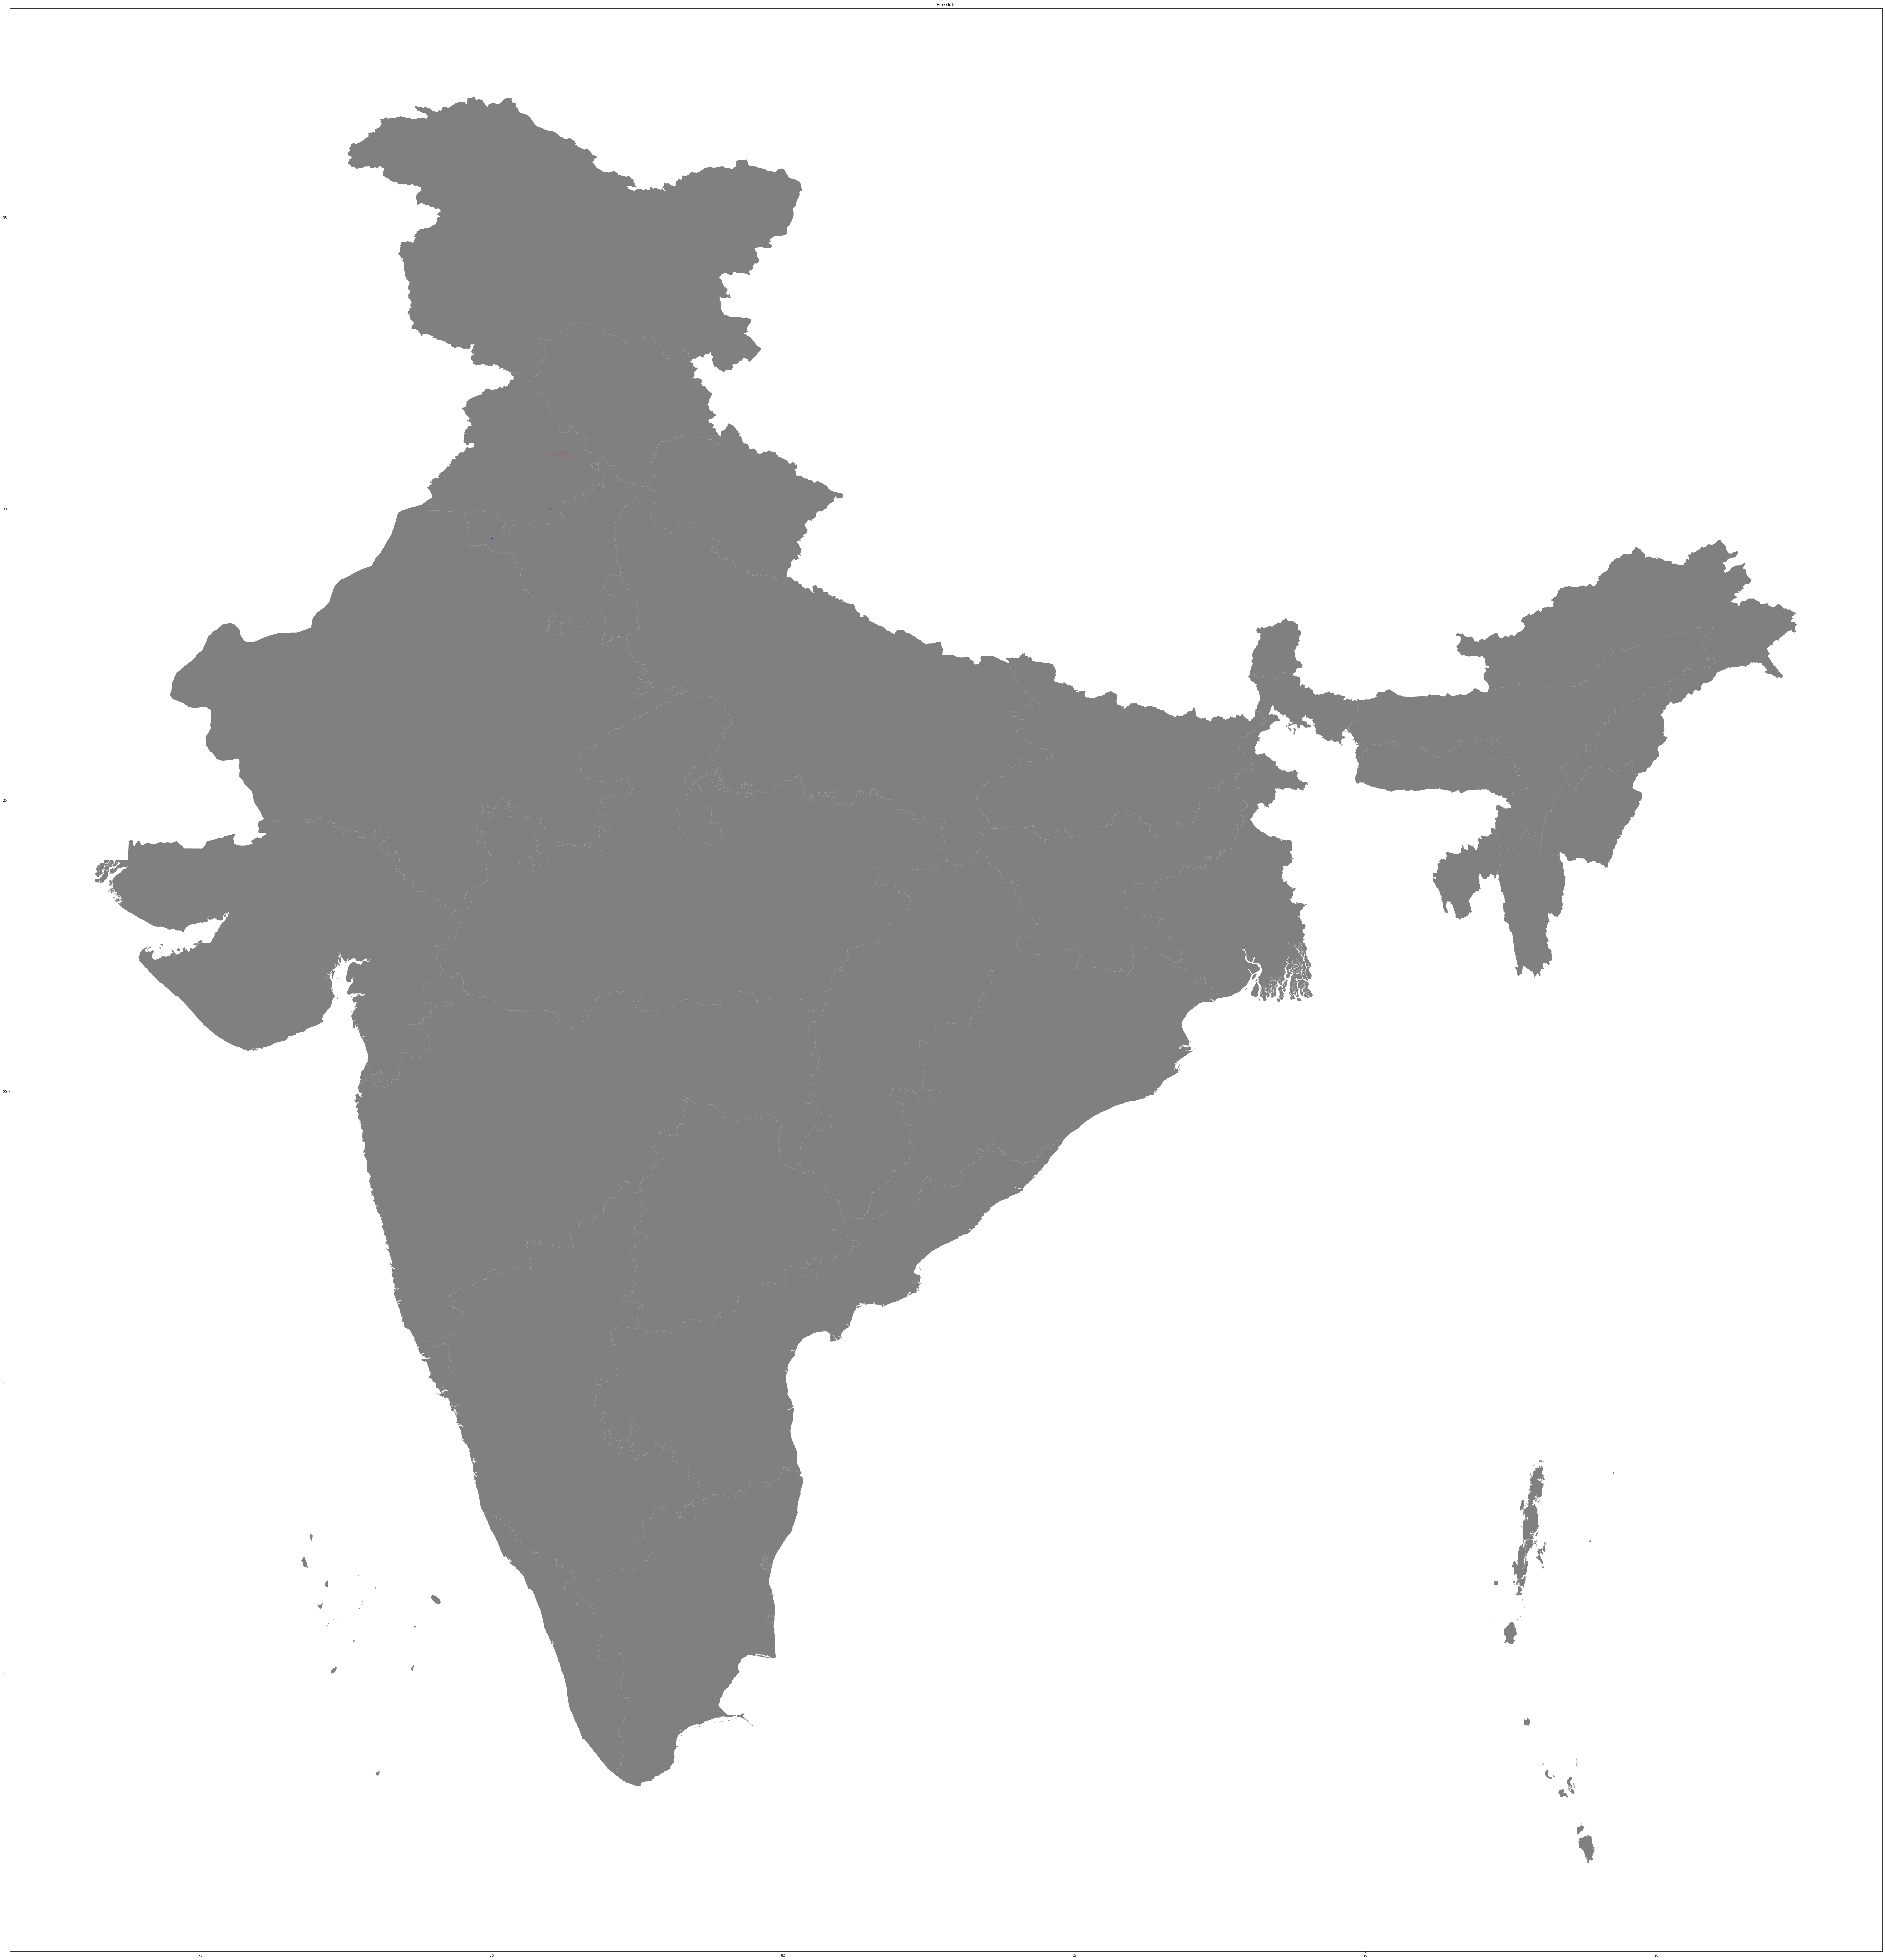

In [292]:
states = geopandas.read_file('/home/naveenggmu/Downloads/NASA data/Igismap/Indian_States.shp')
g = [Point(xy) for xy in zip(cord_df['longss'], cord_df['latss'])]

g1 = [Point(xy) for xy in zip(outside['longss'], outside['latss'])]

geo_df = geopandas.GeoDataFrame(cord_df, geometry = g)
geo_df_area = geopandas.GeoDataFrame(outside, geometry = g1)
fig, ax = plt.subplots(figsize = (100,100))
states.plot(color='grey', ax=ax, alpha = 1)
geo_df.plot(color='red', markersize=5, ax=ax, label = 'Fire', alpha = 0.1)
geo_df_area.plot(color='blue', markersize=5, ax=ax, label = 'Corner')

plt.title('Fire dots')